## pytorch的参数优化阶段：
- 通过backward计算梯度
- 选定合适的损失函数
- 选定合适的梯度下降算法，对损失函数使用算法迭代计算梯度

## 传统梯度下降的缺陷：
- 缺乏动量，导致陷入极小点或者鞍点
- 学习率固定，导致在最优点附近震荡或者迭代速度过慢

In [1]:
import numpy as np
import torch

In [2]:
x=np.arange(5)
t=torch.from_numpy(x)
t

tensor([0, 1, 2, 3, 4], dtype=torch.int32)

In [3]:
t[0]=1

In [4]:
x

array([1, 1, 2, 3, 4])

In [5]:
a=t.numpy()

In [7]:
type(a)

numpy.ndarray

In [8]:
l=x.tolist()
l

[1, 1, 2, 3, 4]

In [9]:
l[1]=30
l

[1, 30, 2, 3, 4]

In [10]:
x

array([1, 1, 2, 3, 4])

### 一. 使用torch.optim.SGD

求 $f(x,y)=-(cos^{2}x+cos^{2}y)^{2}$的极小值

In [11]:
import torch.optim
x = torch.tensor([np.pi/3,np.pi/6],requires_grad=True)
opt=torch.optim.SGD([x],lr=0.1,momentum=0)##先不使用动量


In [23]:
for i in range(11):
    if i:
        opt.zero_grad()
        f.backward()
        opt.step()
    
    f = -((x.cos()**2).sum())**2
    print('i {}: x={},f={}'.format(i,np.round(x.tolist(),3),f))

i 0: x=[0. 0.],f=-4.0
i 1: x=[0. 0.],f=-4.0
i 2: x=[0. 0.],f=-4.0
i 3: x=[0. 0.],f=-4.0
i 4: x=[0. 0.],f=-4.0
i 5: x=[0. 0.],f=-4.0
i 6: x=[0. 0.],f=-4.0
i 7: x=[0. 0.],f=-4.0
i 8: x=[0. 0.],f=-4.0
i 9: x=[0. 0.],f=-4.0
i 10: x=[0. 0.],f=-4.0


## 二. 使用torch.optim.Adam

Adama优化函数在SGD的基础上，综合动量和自适应的学习率，避免出现SGD的两个问题

求Himmelblau函数的极小值



In [3]:
def himmelblau(x):
    return (x[0]**2+x[1]-11)**2+(x[0]+x[1]**2-7)**2

In [18]:
##画出himemelblau的函数图像
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns;sns.set()


In [6]:
x=np.arange(-6,6,0.1)
y=np.arange(-6,6,0.1)
X,Y=np.meshgrid(x,y)
X.shape

(120, 120)

In [7]:
x.shape

(120,)

In [8]:
x

array([-6.00000000e+00, -5.90000000e+00, -5.80000000e+00, -5.70000000e+00,
       -5.60000000e+00, -5.50000000e+00, -5.40000000e+00, -5.30000000e+00,
       -5.20000000e+00, -5.10000000e+00, -5.00000000e+00, -4.90000000e+00,
       -4.80000000e+00, -4.70000000e+00, -4.60000000e+00, -4.50000000e+00,
       -4.40000000e+00, -4.30000000e+00, -4.20000000e+00, -4.10000000e+00,
       -4.00000000e+00, -3.90000000e+00, -3.80000000e+00, -3.70000000e+00,
       -3.60000000e+00, -3.50000000e+00, -3.40000000e+00, -3.30000000e+00,
       -3.20000000e+00, -3.10000000e+00, -3.00000000e+00, -2.90000000e+00,
       -2.80000000e+00, -2.70000000e+00, -2.60000000e+00, -2.50000000e+00,
       -2.40000000e+00, -2.30000000e+00, -2.20000000e+00, -2.10000000e+00,
       -2.00000000e+00, -1.90000000e+00, -1.80000000e+00, -1.70000000e+00,
       -1.60000000e+00, -1.50000000e+00, -1.40000000e+00, -1.30000000e+00,
       -1.20000000e+00, -1.10000000e+00, -1.00000000e+00, -9.00000000e-01,
       -8.00000000e-01, -

In [9]:
X

array([[-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
       [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
       [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
       ...,
       [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
       [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
       [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9]])

In [10]:
X.shape

(120, 120)

In [12]:
Z=himmelblau([X,Y])
Z.shape

(120, 120)

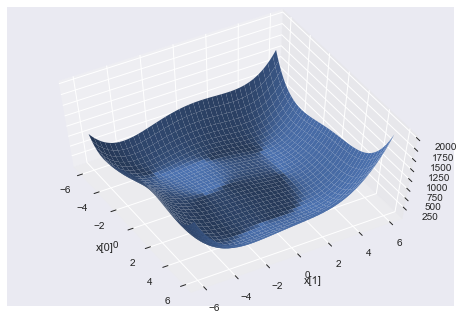

In [19]:
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.plot_surface(X,Y,Z)
ax.view_init(60,-30)
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]');

In [33]:
init=[0,0]
x=torch.tensor(init,requires_grad=True,dtype=torch.float)
opt=torch.optim.Adam([x])
f=himmelblau(x)
print('with init-vals:{}'.format(init))
for i in range(20000):
    opt.zero_grad()
    f.backward()
    opt.step()
    
    f=himmelblau(x)
    if i % 1000 == 0:
        print('i:{},f={},x={},x.grad={}'.format(i,np.round(f.tolist(),5),np.round(x.tolist(),3),np.round(x.grad.tolist(),3)))

with init-vals:[0, 0]
i:0,f=169.96396,x=[0.001 0.001],x.grad=[-14. -22.]
i:1000,f=88.3222,x=[1.271 1.119],x.grad=[-50.966 -36.574]
i:2000,f=13.69567,x=[2.333 1.954],x.grad=[-35.349 -13.864]
i:3000,f=0.66671,x=[2.852 2.114],x.grad=[-7.935  1.216]
i:4000,f=0.01479,x=[2.982 2.027],x.grad=[-0.78   0.579]
i:5000,f=4e-05,x=[2.999 2.001],x.grad=[-0.035  0.033]
i:6000,f=0.0,x=[3. 2.],x.grad=[-0.001  0.   ]
i:7000,f=0.0,x=[3. 2.],x.grad=[-0.  0.]
i:8000,f=0.0,x=[3. 2.],x.grad=[-0.  0.]
i:9000,f=0.0,x=[3. 2.],x.grad=[-0.  0.]
i:10000,f=0.0,x=[3. 2.],x.grad=[-0.  0.]
i:11000,f=0.0,x=[3. 2.],x.grad=[-0.  0.]
i:12000,f=0.0,x=[3. 2.],x.grad=[-0.  0.]
i:13000,f=0.0,x=[3. 2.],x.grad=[-0.  0.]
i:14000,f=0.0,x=[3. 2.],x.grad=[-0.  0.]
i:15000,f=0.0,x=[3. 2.],x.grad=[0. 0.]
i:16000,f=0.0,x=[3. 2.],x.grad=[0. 0.]
i:17000,f=0.0,x=[3. 2.],x.grad=[0. 0.]
i:18000,f=0.0,x=[3. 2.],x.grad=[0. 0.]
i:19000,f=0.0,x=[3. 2.],x.grad=[0. 0.]


In [34]:
init=[-1,0]
x=torch.tensor(init,requires_grad=True,dtype=torch.float)
opt=torch.optim.Adam([x])
f=himmelblau(x)
print('with init-vals:{}'.format(init))
for i in range(20000):
    opt.zero_grad()
    f.backward()
    opt.step()
    
    f=himmelblau(x)
    if i % 1000 == 0:
        print('i:{},f={},x={},x.grad={}'.format(i,np.round(f.tolist(),5),np.round(x.tolist(),3),np.round(x.grad.tolist(),3)))

with init-vals:[-1, 0]
i:0,f=163.95598,x=[-1.001e+00  1.000e-03],x.grad=[ 24. -20.]
i:1000,f=89.13893,x=[-2.067  1.192],x.grad=[ 30.501 -47.504]
i:2000,f=20.42502,x=[-2.704  2.323],x.grad=[  6.16  -42.788]
i:3000,f=0.94888,x=[-2.8    2.974],x.grad=[  0.157 -11.771]
i:4000,f=0.0021,x=[-2.805  3.124],x.grad=[ 0.008 -0.581]
i:5000,f=0.0,x=[-2.805  3.131],x.grad=[ 0.001 -0.003]
i:6000,f=0.0,x=[-2.805  3.131],x.grad=[ 0.    -0.001]
i:7000,f=0.0,x=[-2.805  3.131],x.grad=[ 0.    -0.001]
i:8000,f=0.0,x=[-2.805  3.131],x.grad=[ 0. -0.]
i:9000,f=0.0,x=[-2.805  3.131],x.grad=[ 0. -0.]
i:10000,f=0.0,x=[-2.805  3.131],x.grad=[ 0. -0.]
i:11000,f=0.0,x=[-2.805  3.131],x.grad=[ 0. -0.]
i:12000,f=0.0,x=[-2.805  3.131],x.grad=[-0. -0.]
i:13000,f=0.0,x=[-2.805  3.131],x.grad=[-0. -0.]
i:14000,f=0.0,x=[-2.805  3.131],x.grad=[-0. -0.]
i:15000,f=0.0,x=[-2.805  3.131],x.grad=[-0. -0.]
i:16000,f=0.0,x=[-2.805  3.131],x.grad=[-0. -0.]
i:17000,f=0.0,x=[-2.805  3.131],x.grad=[-0. -0.]
i:18000,f=0.0,x=[-2.805  3.

In [35]:
init=[-4,0]
x=torch.tensor(init,requires_grad=True,dtype=torch.float)
opt=torch.optim.Adam([x])
f=himmelblau(x)
print('with init-vals:{}'.format(init))
for i in range(20000):
    opt.zero_grad()
    f.backward()
    opt.step()
    
    f=himmelblau(x)
    if i % 1000 == 0:
        print('i:{},f={},x={},x.grad={}'.format(i,np.round(f.tolist(),5),np.round(x.tolist(),3),np.round(x.grad.tolist(),3)))

with init-vals:[-4, 0]
i:0,f=145.88806,x=[-3.999e+00 -1.000e-03],x.grad=[-102.   10.]
i:1000,f=75.74881,x=[-3.404 -1.316],x.grad=[-7.427 44.155]
i:2000,f=19.40986,x=[-3.527 -2.5  ],x.grad=[ 6.457 40.657]
i:3000,f=0.76683,x=[-3.732 -3.144],x.grad=[ 1.529 10.263]
i:4000,f=0.0012,x=[-3.777 -3.278],x.grad=[0.064 0.425]
i:5000,f=0.0,x=[-3.779 -3.283],x.grad=[0.001 0.001]
i:6000,f=0.0,x=[-3.779 -3.283],x.grad=[0.    0.001]
i:7000,f=0.0,x=[-3.779 -3.283],x.grad=[0. 0.]
i:8000,f=0.0,x=[-3.779 -3.283],x.grad=[0. 0.]
i:9000,f=0.0,x=[-3.779 -3.283],x.grad=[0. 0.]
i:10000,f=0.0,x=[-3.779 -3.283],x.grad=[0. 0.]
i:11000,f=0.0,x=[-3.779 -3.283],x.grad=[0. 0.]
i:12000,f=0.0,x=[-3.779 -3.283],x.grad=[-0.  0.]
i:13000,f=0.0,x=[-3.779 -3.283],x.grad=[-0.  0.]
i:14000,f=0.0,x=[-3.779 -3.283],x.grad=[0. 0.]
i:15000,f=0.0,x=[-3.779 -3.283],x.grad=[0. 0.]
i:16000,f=0.0,x=[-3.779 -3.283],x.grad=[0. 0.]
i:17000,f=0.0,x=[-3.779 -3.283],x.grad=[0. 0.]
i:18000,f=0.0,x=[-3.779 -3.283],x.grad=[0. 0.]
i:19000,f=0.0,

In [36]:
init=[4,0]
x=torch.tensor(init,requires_grad=True,dtype=torch.float)
opt=torch.optim.Adam([x])
f=himmelblau(x)
print('with init-vals:{}'.format(init))
for i in range(20000):
    opt.zero_grad()
    f.backward()
    opt.step()
    
    f=himmelblau(x)
    if i % 1000 == 0:
        print('i:{},f={},x={},x.grad={}'.format(i,np.round(f.tolist(),5),np.round(x.tolist(),3),np.round(x.grad.tolist(),3)))

with init-vals:[4, 0]
i:0,f=33.91608,x=[ 3.999e+00 -1.000e-03],x.grad=[74. 10.]
i:1000,f=6.02157,x=[ 3.525 -1.027],x.grad=[ 0.761 10.738]
i:2000,f=0.09837,x=[ 3.574 -1.764],x.grad=[-0.475  2.241]
i:3000,f=0.0,x=[ 3.584 -1.848],x.grad=[-0.004  0.016]
i:4000,f=0.0,x=[ 3.584 -1.848],x.grad=[-0.001  0.   ]
i:5000,f=0.0,x=[ 3.584 -1.848],x.grad=[-0.  0.]
i:6000,f=0.0,x=[ 3.584 -1.848],x.grad=[-0.  0.]
i:7000,f=0.0,x=[ 3.584 -1.848],x.grad=[-0.  0.]
i:8000,f=0.0,x=[ 3.584 -1.848],x.grad=[-0.  0.]
i:9000,f=0.0,x=[ 3.584 -1.848],x.grad=[-0.  0.]
i:10000,f=0.0,x=[ 3.584 -1.848],x.grad=[-0.  0.]
i:11000,f=0.0,x=[ 3.584 -1.848],x.grad=[-0.  0.]
i:12000,f=0.0,x=[ 3.584 -1.848],x.grad=[0. 0.]
i:13000,f=0.0,x=[ 3.584 -1.848],x.grad=[0. 0.]
i:14000,f=0.0,x=[ 3.584 -1.848],x.grad=[0. 0.]
i:15000,f=0.0,x=[ 3.584 -1.848],x.grad=[0. 0.]
i:16000,f=0.0,x=[ 3.584 -1.848],x.grad=[0. 0.]
i:17000,f=0.0,x=[ 3.584 -1.848],x.grad=[0. 0.]
i:18000,f=0.0,x=[ 3.584 -1.848],x.grad=[0. 0.]
i:19000,f=0.0,x=[ 3.584 -1.84

In [40]:
from torch.autograd import Variable
init=[0,0]
x=torch.tensor(init,dtype=torch.float)
x=Variable(x,requires_grad=True)
opt=torch.optim.Adam([x])
f=himmelblau(x)
print('with init-vals:{}'.format(init))
for i in range(20000):
    opt.zero_grad()
    f.backward()
    opt.step()
    
    f=himmelblau(x)
    if i % 1000 == 0:
        print('i:{},f={},x={},x.grad={}'.format(i,np.round(f.tolist(),5),np.round(x.tolist(),3),np.round(x.grad.tolist(),3)))

with init-vals:[0, 0]
i:0,f=169.96396,x=[0.001 0.001],x.grad=[-14. -22.]
i:1000,f=88.3222,x=[1.271 1.119],x.grad=[-50.966 -36.574]
i:2000,f=13.69567,x=[2.333 1.954],x.grad=[-35.349 -13.864]
i:3000,f=0.66671,x=[2.852 2.114],x.grad=[-7.935  1.216]
i:4000,f=0.01479,x=[2.982 2.027],x.grad=[-0.78   0.579]
i:5000,f=4e-05,x=[2.999 2.001],x.grad=[-0.035  0.033]
i:6000,f=0.0,x=[3. 2.],x.grad=[-0.001  0.   ]
i:7000,f=0.0,x=[3. 2.],x.grad=[-0.  0.]
i:8000,f=0.0,x=[3. 2.],x.grad=[-0.  0.]
i:9000,f=0.0,x=[3. 2.],x.grad=[-0.  0.]
i:10000,f=0.0,x=[3. 2.],x.grad=[-0.  0.]
i:11000,f=0.0,x=[3. 2.],x.grad=[-0.  0.]
i:12000,f=0.0,x=[3. 2.],x.grad=[-0.  0.]
i:13000,f=0.0,x=[3. 2.],x.grad=[-0.  0.]
i:14000,f=0.0,x=[3. 2.],x.grad=[-0.  0.]
i:15000,f=0.0,x=[3. 2.],x.grad=[0. 0.]
i:16000,f=0.0,x=[3. 2.],x.grad=[0. 0.]
i:17000,f=0.0,x=[3. 2.],x.grad=[0. 0.]
i:18000,f=0.0,x=[3. 2.],x.grad=[0. 0.]
i:19000,f=0.0,x=[3. 2.],x.grad=[0. 0.]
